<a href="https://colab.research.google.com/github/cecilegltslmcs/cats-classification/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats Classifier

In [32]:
!pip install missingno

In [33]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, Sequential

%matplotlib inline

In [44]:
sns.set_palette("Pastel2")
sns.set_theme("notebook")

In [2]:
# Google Drive connexion
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Projets/Cats-classification/dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1) Reading a random picture

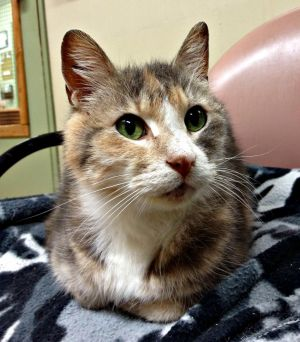

In [3]:
name = "Dilute Calico/31860731_7498.jpg"
fullname = f'{path}/{name}'

# print a kitty picture
load_img(fullname)

In [4]:
# changing size
img = load_img(fullname, target_size=(299,299))

In [5]:
x = np.array(img)
x.shape

(299, 299, 3)

## 2) Exploratory Data Analysis

Let's examine the number of breeds we have and the numbers of pictures for each.

In [52]:
csv_name = "cats.csv"
path_csvfile = f"{path}/{csv_name}"
df = pd.read_csv(path_csvfile)
df.drop(["Unnamed: 0", "type", "url", "photos", "med_photos"], axis=1, inplace=True)

In [53]:
df.head()

,id,age,gender,size,coat,breed
0,46744842,Adult,Female,Medium,NaN,Abyssinian
1,46717321,Adult,Male,Extra Large,NaN,Abyssinian
2,46626338,Senior,Female,Medium,NaN,Abyssinian
3,46620170,Baby,Female,Small,Short,Abyssinian
4,46582751,Young,Female,Medium,NaN,Abyssinian


<Axes: >

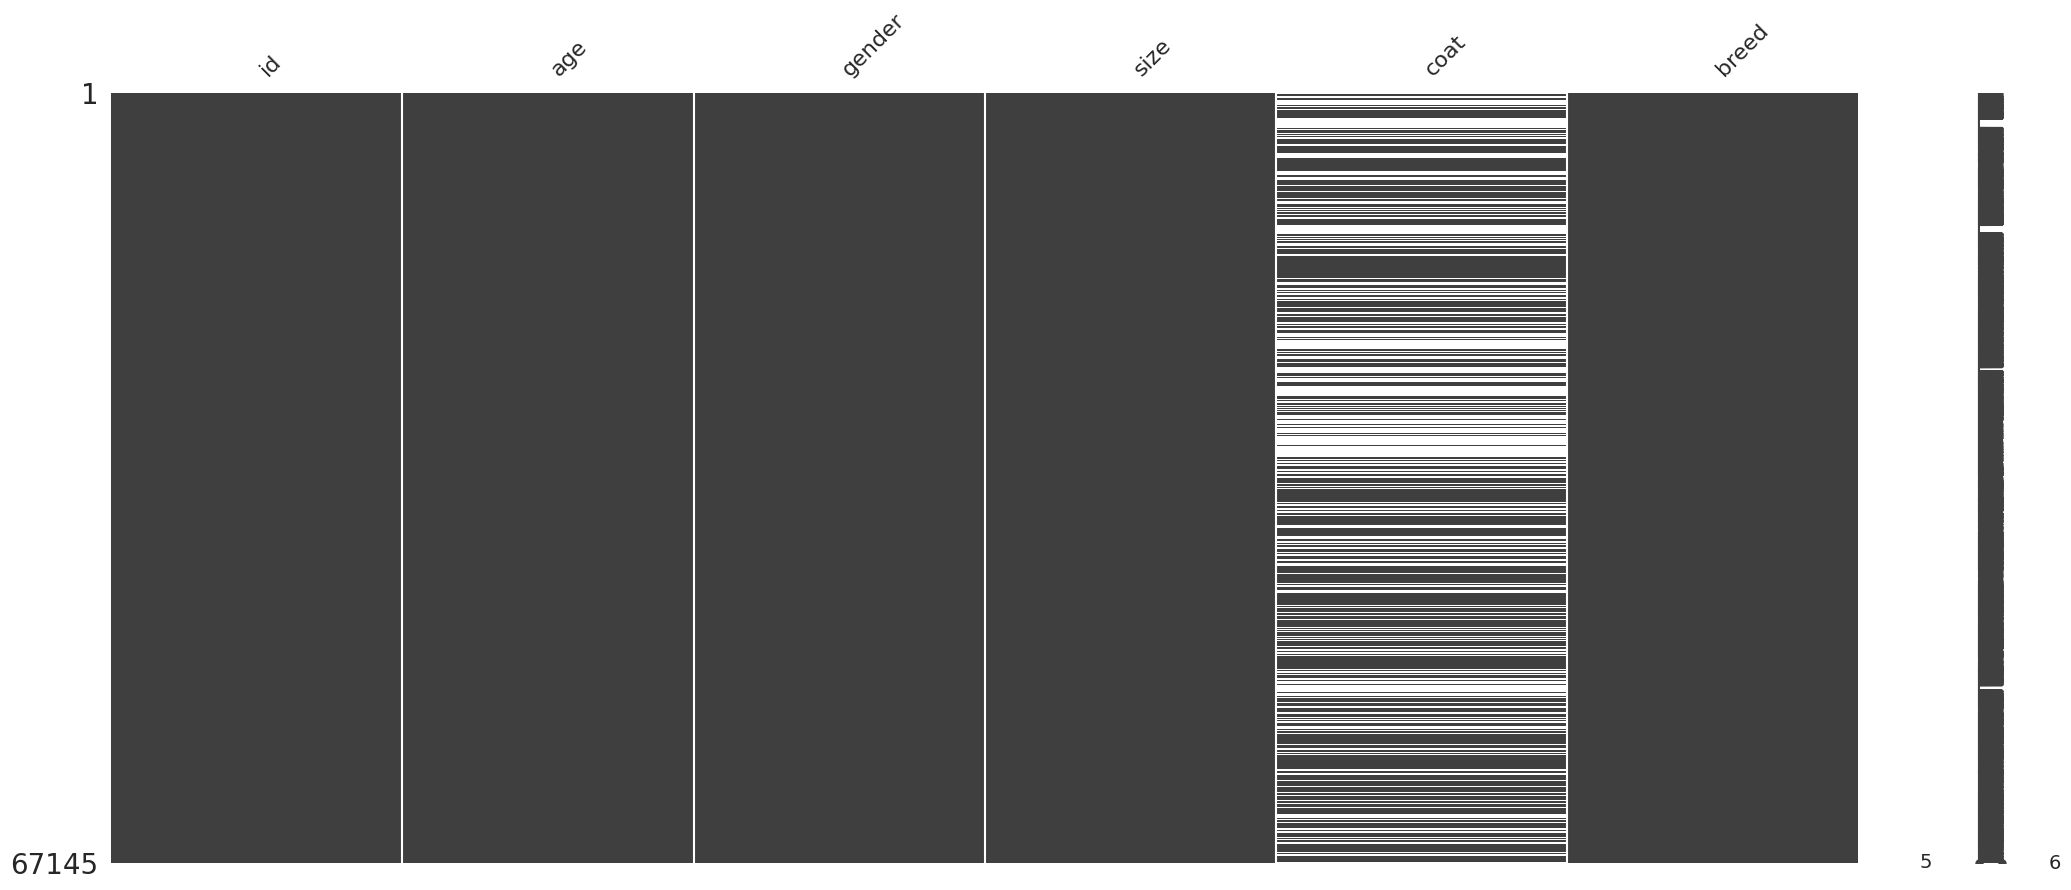

In [54]:
msno.matrix(df)

In [55]:
round(df.isnull().mean() * 100, 2)

id         0.00
age        0.00
gender     0.00
size       0.00
coat      37.43
breed      0.00
dtype: float64

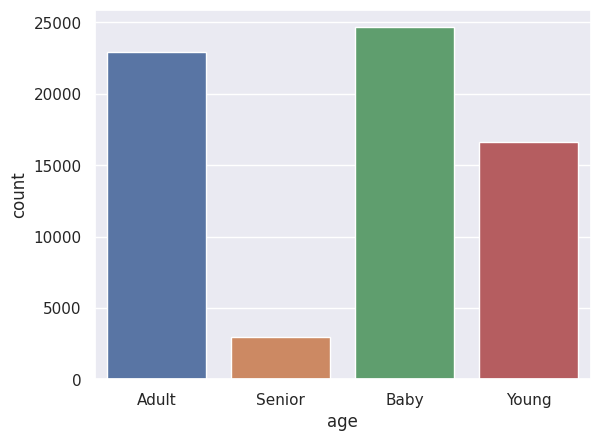

In [56]:
sns.countplot(x="age", data=df)
plt.show()

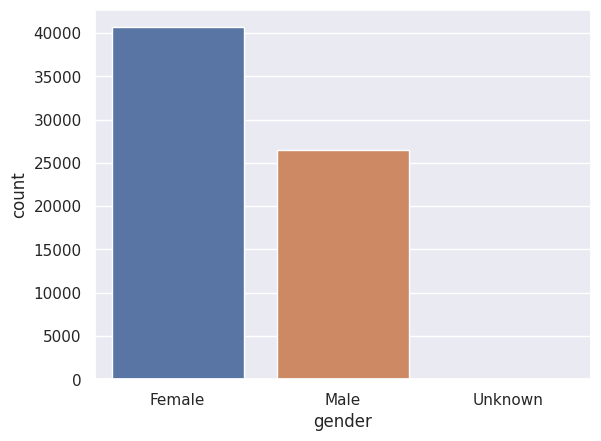

In [57]:
sns.countplot(x="gender", data=df)
plt.show()

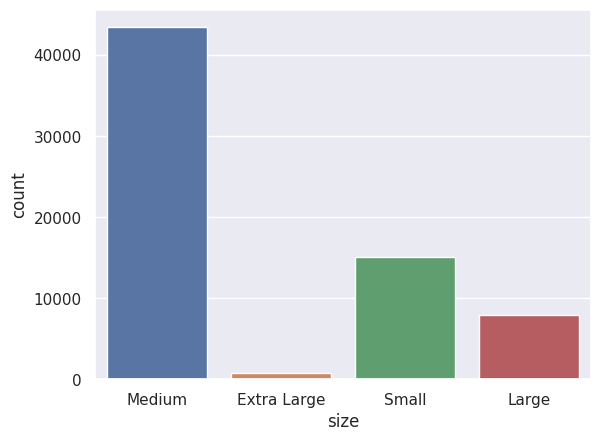

In [58]:
sns.countplot(x="size", data=df)
plt.show()

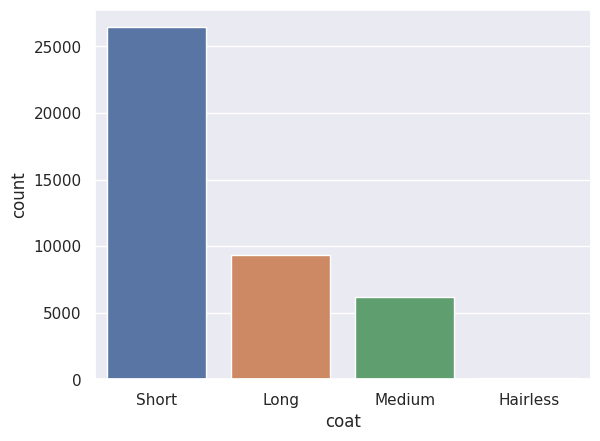

In [59]:
sns.countplot(x="coat", data=df)
plt.show()

In [60]:
print(f'Number of breeds: {df["breed"].nunique()}')

Number of breeds: 67


In [67]:
df["breed"].value_counts()[:15]

Domestic Short Hair     4049
Persian                 3999
Domestic Long Hair      3967
American Shorthair      3964
Domestic Medium Hair    3819
Calico                  3389
Dilute Calico           3212
Dilute Tortoiseshell    3144
Siamese                 2695
Ragdoll                 2656
Torbie                  2525
Tuxedo                  2240
Manx                    2048
Bengal                  2044
Tabby                   1989
Name: breed, dtype: int64

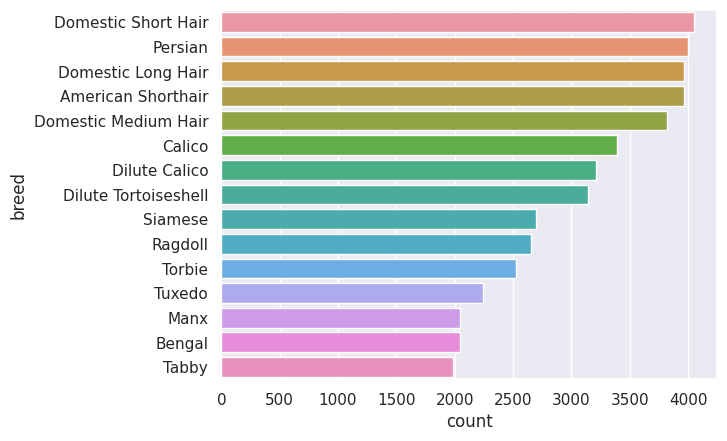

In [62]:
sns.countplot(y="breed",
              data=df,
              order=df["breed"].value_counts().index[:15])
plt.show()

## 3) Modelisation

### a) Preparing the data

In [63]:
img_height = 299
img_width = 299
batch_size = 32
channel = 3
num_classes = df["breed"].nunique()

In [64]:
# Creating a train set
train_set = image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

KeyboardInterrupt: ignored

In [ ]:
# Creating a validation set
val_set = image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size)

### b) Custom CNN

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(img_height, img_width, channel)))
model.add(layers.Rescaling(1./255))
model.add(layers.Conv2D(32, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(num_classes, activation="softmax"))

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.sparse_categorical_entropy,
    metrics=["accuracy"]
)

In [ ]:
model.summary()

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
t0 = time()

epochs = 10

# training model + time measure
history = model.fit(
  train_set,
  validation_data=val_set,
  epochs=epochs)

print("Done in %0.3fs." % (time() - t0))

In [ ]:
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
validation_loss = history.history['val_loss']

In [ ]:
# Accuracy and Loss graphical representation
plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
mean_accuracy = np.mean(history.history["accuracy"])
std_accuracy = np.std(history.history["accuracy"])
mean_validation_accuracy = np.mean(history.history["val_accuracy"])
std_validation_accuracy = np.std(history.history["val_accuracy"])

mean_loss = np.mean(history.history["loss"])
std_loss = np.std(history.history["loss"])
mean_validation_loss = np.mean(history.history["loss"])
std_validation_loss = np.std(history.history["loss"])

In [ ]:
print(f"Mean Accuracy: {mean_accuracy} +/- {std_accuracy} & Mean Validation Accuracy: {mean_validation_accuracy} +/- {std_validation_accuracy}")
print(f"Mean Loss: {mean_loss} +/- {std_loss} & Mean Validation Loss: {mean_validation_loss} +/- {std_validation_loss}")

**Some resources about Optimizer and Loss Functions when performing a multiclasses classification:**

- [Adam Optimizer for multiclasses classification](https://towardsdatascience.com/multiclass-classification-neural-network-using-adam-optimizer-fb9a4d2f73f4)
- [Understanding Loss functions for classification](https://medium.com/mlearning-ai/understanding-loss-functions-for-classification-81c19ee72c2a)

### b) Transfer Learning

- MobileNet
- VGG16/19
- Xception
- EfficientBNet